# Libraries

In [ ]:
import pandas as pd
import dask.dataframe as dd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Overview of the Data

MIMIC-III (‘Medical Information Mart for Intensive Care’) is a large, single-center database comprising information relating to patients admitted to critical care units at a large tertiary care hospital. Data includes vital signs, medications, laboratory measurements, observations and notes charted by care providers, fluid balance, procedure codes, diagnostic codes, imaging reports, hospital length of stay, survival data, and more.   
MIMIC-III is a relational database consisting of 26 tables. Here we want to give a overview of each single table.

The table descriptions reference to the descriptions given on the official [physionet website](https://mimic.physionet.org/) describing the MIMIC tables as well as the [nature article](https://pubmed.ncbi.nlm.nih.gov/23367074/) by Mikhno and Ennett.  

# Patient list

Our study will be about patients that have went through acute respiratory failure(ARD). There seperation was made from the patients table with the ICD 9 code 51881. Then we saved the list in a csv file.

In [ ]:
liste_patienten = list(pd.read_csv('data/liste_patienten.csv'))
liste_patienten = [int(x) for x in liste_patienten]

# ADMISSIONS table

The ADMISSIONS table gives information regarding a patient’s admission to the hospital. Since each unique hospital visit for a patient is assigned a unique HADM_ID, the ADMISSIONS table can be considered as a definition table for HADM_ID. Information available includes timing information for admission and discharge, demographic information, the source of the admission, and so on.  

|Column| Describtion|Type|
|:-----|:-----------|:----|
|ROW_ID |gives a index of the table |int|  
|SUBJECT_ID|gives a index to every single patient|int|    
|HADM_ID|range(100000 - 1999999), which represents a single patient’s admission to the hospital | int|  
|ADMITTIME|provides the date and time the patient was admitted to the hospital |Timestamp |  
|DISCHTIME| provides the date and time the patient was discharged from the hospital|TIMESTAMP|  
|DEATHTIME| provides (if applicable)the time of in-hospital death for the patient. Is only present if the patient died in-hospital, and is almost always the same as the patient’s DISCHTIME.|TIMESTAMP|   
|ADMISSION_TYPE| describes the type of the admission: ‘ELECTIVE’, ‘URGENT’, ‘NEWBORN’ or ‘EMERGENCY’. Emergency/urgent indicate unplanned medical care, and are often collapsed into a single category in studies. Elective indicates a previously planned hospital admission. Newborn indicates that the HADM_ID pertains to the patient’s birth.|string|    
|ADMISSION_LOCATION|provides information about the previous location of the patient prior to arriving at the hospital. There are 9 possible values: EMERGENCY ROOM ADMIT, TRANSFER FROM HOSP/EXTRAM, TRANSFER FROM OTHER HEALT, CLINIC REFERRAL/PREMATURE, INFO NOT AVAILABLE, TRANSFER FROM SKILLED NUR, TRSF WITHIN THIS FACILITY, HMO REFERRAL/SICK, PHYS REFERRAL/NORMAL DELI|string| 
|DISCHARGE_LOCATION	| provides information about the location when the patient is descharged|string|   
|INSURANCE|describes the health insurance of the patient |string|
|LANGUAGE|native language |string|
|RELIGION|religious affiliation |string|
|MARITAL_STATUS|marital status  |string|
|ETHNICITY|	ethnicity = not important |string|
|EDREGTIME|time that the patient was registered from the emergency department|	TIMESTAMP|
|EDOUTTIME|	time that the patient was discharged from the emergency department|TIMESTAMP|
|DIAGNOSIS|	provides a preliminary, free text diagnosis for the patient on hospital admission. The diagnosis is usually assigned by the admitting clinician and does not use a systematic ontology. |string|
|HOSPITAL_EXPIRE_FLAG|indicates whether the patient died within the given hospitalization. 1 indicates death in the hospital, and 0 indicates survival to hospital discharge.|integer|
|HAS_CHARTEVENTS_DATA|	indicates wether the patient occurs in the Charteventstable. 1 indicates has charteventsdata, and 0 indicates not.|integer|

In [ ]:
df_admissions = pd.read_csv('data/ADMISSIONS.csv.gz', compression='gzip')

In [ ]:
df_admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [ ]:
df_admissions.shape

(58976, 19)

In [ ]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
ROW_ID                  58976 non-null int64
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null object
DISCHTIME               58976 non-null object
DEATHTIME               5854 non-null object
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                33644 non-null object
RELIGION                58518 non-null object
MARITAL_STATUS          48848 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               30877 non-null object
EDOUTTIME               30877 non-null object
DIAGNOSIS               58951 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
HAS_CHARTEVENTS_DATA    58976 non-null int64
dtypes: int64(5), objec

In [ ]:
df_admissions.SUBJECT_ID.nunique()

46520

Here it is to be seen: The Dataset contains 58976 Admissions of 46520 patients.

## Exclude the newborns

In [ ]:
# drop out the newborn babies, so that are only adults in the dataframe
df_admissions_adults = df_admissions[df_admissions.ADMISSION_TYPE != "NEWBORN"]

In [ ]:
df_admissions_adults.shape

(51113, 19)

## Chartevent connection

In [ ]:
# How many adult admission have no entries in the chartevents?
len(df_admissions_adults[df_admissions_adults.HAS_CHARTEVENTS_DATA == 0])

1492

In [ ]:
# Check how many Admissions of them have ARDS
df_admissions_adults[df_admissions_adults.HAS_CHARTEVENTS_DATA == 0].HADM_ID.isin(liste_patienten).sum()

53

There are 1492 admissions without any entry in the CHARTTIMEEVENT Table. Only 53 of these admissions represent patients with ARDS. Because the most important informations is to be found in the CHARTTIMEEVENT Table, we have to work without these patients.

## Create a function: 
that prints the patients that are missing from our list in the table

In [ ]:
def missing(df):
    #seperate our patients
    ARDS = df.loc[df['HADM_ID'].isin(liste_patienten)]
    #Missing from our list
    miss = len(liste_patienten)- ARDS.HADM_ID.nunique()
    print('Patients report from our list:')
    print(f'Missing: {miss}')
    print(f'perc.: {round(miss/len(liste_patienten)*100,2)}%')
    #Present patients from out list
    present = ARDS.HADM_ID.nunique()
    print(f'Present: {present}')
    print(f'perc.: {round(present/len(liste_patienten)*100,2)}%')
    #unique patients
    present = ARDS.HADM_ID.nunique()
    print(f'percentage of unique number of ARDS_patients in the table: {round(present/len(ARDS.HADM_ID)*100,2)}%')

In [ ]:
missing(df_admissions)

Patients report from our list:
Missing: 0
perc.: 0.0%
Present: 7497
perc.: 100.0%
percentage of unique number of ARDS_patients in the table: 100.0%


There are no patients missing from our list and there are no duplicates of them in this table

## Mortality

**Mortality all in all**

In [ ]:
len(df_admissions[df_admissions.HOSPITAL_EXPIRE_FLAG == 1])

5854

Of all 58976 admissions 5854 patients died in hospital = 10%.

**Mortality Adults**

In [ ]:
len(df_admissions_adults[df_admissions_adults.HOSPITAL_EXPIRE_FLAG == 1])

5792

Of all adult admissions (51113) died 5792 patients in hospital = 11%.

**Mortality Babies**

The mortality rate of the babies is: 62 / 7833 = 0,8% , significantly less than among the adults.

# Excluded tables

## CALLOUT

The CALLOUT table provides information about ICU discharge planning. When a patient is deemed ready to leave the ICU, they are “called out”. This process involves: (i) a care provider registering that the patient is ready to leave the ICU and detailing any specialized precautions required, (ii) a coordinator acknowledging the patient requires a bed outside the ward, (iii) a variable period of time in order to coordinate the transfer, and finally (iv) an outcome: either the patient is called out (discharged) or the call out event is canceled. This table provides information for all of the above.

We will exclude this table because it is not contributing in our study

## CAREGIVERS

This table provides information regarding care givers. For example, it would define if a care giver is a research nurse (RN), medical doctor (MD), and so on.

Also not important information for our study

## D_CPT

This table gives some high level information regarding current procedural terminology (CPT) codes. Unfortunately, detailed information for individual codes is unavailable.

The form of the information isn't helping us much with our study

## NOTEEVENTS

In text form we have admission information, that wont help in our study

## TRANSFERS

Physical locations for patients throughout their hospital stay.

# CHARTEVENT 

## Loading entire file 

Because this file alone 340,000,000 rows with almost 35Gb size and was impossible to load, we had to filter our patients from our list and split it in pieces. Using sql and cloud we are able to call this table

In [ ]:
import psycopg2
conn_string = open('DB_connection.txt', 'r', encoding='UTF-8').read()

In [ ]:
conn = eval('psycopg2.connect({})'.format(conn_string.strip()))

In [ ]:
#load the 100,000 first rows
sql = """select * from vw_t_chartevents LIMIT 100000"""

In [ ]:
df_chart = pd.read_sql(sql, conn)

In [ ]:
df_chart.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,236745855,11572.0,184613.0,283391.0,8553.0,2102-08-06 22:30:00,2102-08-06 22:30:00,21335.0,30,30.0,BPM,None,None,None,NotStopd
1,236745856,11572.0,184613.0,283391.0,8554.0,2102-08-06 22:30:00,2102-08-06 22:30:00,21335.0,100,100.0,%,None,None,None,NotStopd
2,236745857,11572.0,184613.0,283391.0,8367.0,2102-08-06 23:00:00,2102-08-06 23:06:00,21335.0,On,NaN,None,None,None,None,NotStopd
3,236745858,11572.0,184613.0,283391.0,8368.0,2102-08-06 23:00:00,2102-08-06 23:06:00,21335.0,55,55.0,mmHg,None,None,None,NotStopd
4,236745859,11572.0,184613.0,283391.0,8381.0,2102-08-06 23:00:00,2102-08-06 23:06:00,21335.0,Diff to Palpate,NaN,None,None,None,None,NotStopd


In [ ]:
df_chart.shape

(100000, 15)

In [ ]:
df_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
row_id          100000 non-null int64
subject_id      100000 non-null float64
hadm_id         100000 non-null float64
icustay_id      100000 non-null float64
itemid          100000 non-null float64
charttime       100000 non-null datetime64[ns]
storetime       100000 non-null datetime64[ns]
cgid            100000 non-null float64
value           100000 non-null object
valuenum        54858 non-null float64
valueuom        54686 non-null object
warning         0 non-null object
error           0 non-null object
resultstatus    0 non-null object
stopped         100000 non-null object
dtypes: datetime64[ns](2), float64(6), int64(1), object(6)
memory usage: 11.4+ MB


### Column Definition

| Column name   | [Definition from official MIMIC website](https://mimic-iv.mit.edu/docs/datasets/icu/chartevents/)                                                                      | 
|:--------------|:---------------------------------------------------------------------------------|
| **ITEMID**        | Identifier for a single measurement type in the database. Each row associated with one ITEMID corresponds to an instantiation of the same measurement.   |    
| **CHARTTIME**     | Records the time at which an observation was made, and is usually the closest proxy to the time the data was actually measured.                                                             |
| **VALUE & VALUENUM**        | VALUE contains the value measured for the concept identified by the ITEMID. If this value is numeric, then VALUENUM contains the same data in a numeric format. If this data is not numeric, VALUENUM is null. In some cases (e.g. scores like Glasgow Coma Scale, Richmond Sedation Agitation Scale and Code Status), VALUENUM contains the score and VALUE contains the score and text describing the meaning of the score.
| **VALUEOM**      | VALUEUOM is the unit of measurement for the VALUE, if appropriate.         |                          

#### Drop irrelevant columns 

Now, we drop columns, not relevant to our analysis. 

In [ ]:
# Drop ROW_ID, CGID, WARNING, ERROR, RESULTSTATUS, STOPPED
to_drop = ['cgid', 'warning', 'error', 'resultstatus', 'stopped']
df_chart = df_chart.drop(to_drop, axis=1)

In [ ]:
df_chart.shape

(100000, 10)

In [ ]:
df_chart.head(3)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,value,valuenum,valueuom
0,236745855,11572.0,184613.0,283391.0,8553.0,2102-08-06 22:30:00,2102-08-06 22:30:00,30,30.0,BPM
1,236745856,11572.0,184613.0,283391.0,8554.0,2102-08-06 22:30:00,2102-08-06 22:30:00,100,100.0,%
2,236745857,11572.0,184613.0,283391.0,8367.0,2102-08-06 23:00:00,2102-08-06 23:06:00,On,NaN,None


In [ ]:
df_chart.sample(25)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,value,valuenum,valueuom
46626,238024457,12895.0,185459.0,294687.0,8381.0,2157-05-25 03:00:00,2157-05-25 03:12:00,Easily Palpable,NaN,None
55340,238246919,13150.0,161818.0,248182.0,8441.0,2180-05-02 01:00:00,2180-05-02 01:15:00,46,46.0,mmHg
96671,238039567,12909.0,125819.0,278741.0,8548.0,2125-02-15 07:00:00,2125-02-15 06:49:00,30,30.0,mmHg
607,236731924,11555.0,192133.0,233969.0,8441.0,2180-06-15 06:00:00,2180-06-15 05:56:00,49,49.0,mmHg
44180,237975332,12821.0,161937.0,264514.0,8365.0,2152-08-25 15:00:00,2152-08-25 17:22:00,Clean and Dry,NaN,None
65948,237924091,12792.0,148515.0,268567.0,8368.0,2132-05-06 11:00:00,2132-05-06 10:52:00,50,50.0,mmHg
80494,238126865,13033.0,108977.0,210032.0,8554.0,2185-01-03 02:05:00,2185-01-03 04:38:00,100,100.0,%
38601,238190117,13086.0,108841.0,275835.0,8553.0,2186-01-31 06:00:00,2186-01-31 06:04:00,35,35.0,BPM
52341,238274387,13183.0,130212.0,297445.0,8392.0,2117-06-13 07:00:00,2117-06-13 10:05:00,Right Radial,NaN,None
93259,237786674,12637.0,172946.0,269994.0,8553.0,2199-03-11 05:30:00,2199-03-11 05:36:00,40,40.0,BPM


3520 unique patients. 

In [ ]:
df_chart.hadm_id.nunique()

92

3860 unique hospital admissions/stays. Thus, some patients were admitted multiple times. 

In [ ]:
# Replace 'NaN' to numpy nan
df_chart.replace('NaN', np.nan, inplace=True)

# Missing Values in HADM
df_chart[df_chart['hadm_id'].isna()]

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,value,valuenum,valueuom


0 Missing values for HADM_ID. 

## Item ID

In [ ]:
# Unique items 
len(df_chart.itemid.unique())

116

478 measurement types. To further understand the Items it is necessary to **load the corresponding dictionary**. We directly loaded only the relevant columns of the dictionary file. 

#### Item Dictionary 

| Column name   | [Definition from official MIMIC website](https://mimic-iv.mit.edu/docs/datasets/icu/chartevents/)                                                                      | 
|:--------------|:---------------------------------------------------------------------------------|
| **LABEL**        |  Describes the concept which is represented by the ITEMID.   |    
| **ABBREVIATION**     |  Lists a common abbreviation for the label (only available in Metavision).|
| **DBSOURCE**        | System used. |
| **CATEGORY**      | Provides some information of the type of data the ITEMID corresponds to.  | 
| **UNITNAME**        | Specifies the unit of measurement used for the ITEMID. |
| **PARAM_TYPE**      | Describes the type of data which is recorded: a date, a number or a text field.         | 
| **CONCEPTID**      | VALUEUOM is the unit of measurement for the VALUE, if appropriate.         | 


In [ ]:
# relevant columns
rel_col = ['ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID']

# read in dictionary with items
df_d_items = pd.read_csv('data/D_ITEMS.csv.gz', 
                         compression='gzip', usecols=rel_col)

In [ ]:
df_d_items.shape

(12487, 8)

Within the MIMIC dataset are 12487 unique measurements

In [ ]:
df_d_items.head(3)

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,497,Patient controlled analgesia (PCA) [Inject],NaN,carevue,NaN,NaN,NaN,NaN
1,498,PCA Lockout (Min),NaN,carevue,NaN,NaN,NaN,NaN
2,499,PCA Medication,NaN,carevue,NaN,NaN,NaN,NaN


In [ ]:
# List all unique chart ID's to compare with ITEMID in dictionary 
len(list(df_chart.itemid.unique()))

116

ARDS patients have received 478 unique measurements. 

**Missing values**

In [ ]:
# Missing Values in Dictionary
df_d_items[df_d_items['LABEL'].isna()]

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
5850,30140,NaN,NaN,carevue,NaN,NaN,NaN,NaN
10341,80001,NaN,NaN,hospital,ORGANISM,NaN,NaN,NaN
10607,70001,NaN,NaN,hospital,SPECIMEN,NaN,NaN,NaN
11789,90001,NaN,NaN,hospital,ANTIBACTERIUM,NaN,NaN,NaN


In [ ]:
df_d_items = df_d_items.dropna(subset=["LABEL"])

Since a ITEM ID without a label is not very useful an the number of missing values is limited, we drop these values from the dictionary.

#### Investigate Label 

**It is important to us, to identify those that match with our research question.** To start, we match the identified ITEM_ID's with the definitions in the list. Based on the Paper by Mikhno, the follow elements were used to define the label: 

- [ ] Airway
- [X] Ventilator Mode (ItemID: 720 (CareVue), 223849 (MetaVision))
- [X] Respiratory Support (ItemID: 3605)
- [X] Breath Rate (ItemID: 3337)
- [ ] Oxygen Delivery Device

Let's see, what we can find in this table. 

In [ ]:
df_d_items[df_d_items.LABEL.str.contains("airway")]

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
149,1209,HFO mean airway Pres,NaN,carevue,NaN,NaN,NaN,NaN
2007,1864,HFO-Max mean airway,NaN,carevue,NaN,NaN,NaN,NaN
2008,1865,HFO-Min mean airway,NaN,carevue,NaN,NaN,NaN,NaN


In [ ]:
df_d_items[df_d_items.LABEL.str.contains("Ventilator Mode")]

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
1488,720,Ventilator Mode,NaN,carevue,NaN,NaN,NaN,NaN
12021,223849,Ventilator Mode,Ventilator Mode,metavision,Respiratory,NaN,Text,NaN


In [ ]:
df_d_items[df_d_items.LABEL.str.contains("Respiratory Support")]

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
3858,3605,Respiratory Support,NaN,carevue,NaN,NaN,NaN,NaN


In [ ]:
df_d_items[df_d_items.LABEL.str.contains("Breath Rate")]

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
1771,3337,Breath Rate,NaN,carevue,NaN,NaN,NaN,NaN


In [ ]:
df_d_items[df_d_items.LABEL.str.contains("Mechanically Ventilated")]

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
11928,226260,Mechanically Ventilated,Mechanically Ventilated,metavision,General,NaN,Checkbox,NaN


#### Investigate Category 

In [ ]:
# Missing Values in Dictionary
df_d_items[df_d_items['CATEGORY'].isna()]

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,497,Patient controlled analgesia (PCA) [Inject],NaN,carevue,NaN,NaN,NaN,NaN
1,498,PCA Lockout (Min),NaN,carevue,NaN,NaN,NaN,NaN
2,499,PCA Medication,NaN,carevue,NaN,NaN,NaN,NaN
3,500,PCA Total Dose,NaN,carevue,NaN,NaN,NaN,NaN
4,501,PCV Exh Vt (Obser),NaN,carevue,NaN,NaN,NaN,NaN
5,927,Allergy 2,NaN,carevue,NaN,NaN,NaN,NaN
6,930,Ext,NaN,carevue,NaN,NaN,NaN,NaN
7,935,Allergy 3,NaN,carevue,NaN,NaN,NaN,NaN
8,938,blood cultures,NaN,carevue,NaN,NaN,NaN,NaN
9,940,trach care,NaN,carevue,NaN,NaN,NaN,NaN


In [ ]:
df_d_items[df_d_items.CATEGORY == 'Intubation']

,ITEMID,LABEL,ABBREVIATION,DBSOURCE,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
8776,227210,Propofol (Intubation),Propofol (Intubation),metavision,Intubation,mg,Numeric,NaN
8777,227211,Ketamine (Intubation),Ketamine (Intubation),metavision,Intubation,mg,Numeric,NaN
8778,227212,Etomidate (Intubation),Etomidate (Intubation),metavision,Intubation,mg,Numeric,NaN
8779,227213,Vecuronium (Intubation),Vecuronium (Intubation),metavision,Intubation,mg,Numeric,NaN
8780,227214,Cis-atracurium (Intubation),Cis-atracurium (Intubation),metavision,Intubation,mg,Numeric,NaN
8781,227215,Succynlocholine (Intubation),Succynlocholine (Intubation),metavision,Intubation,mg,Numeric,NaN
9505,228643,Barrier precautions in place (Intubation),Barrier precautions in place (Intubation),metavision,Intubation,NaN,Text,NaN
9568,222871,Mallampati classification (Intubation),Mallampati classification (Intubation),metavision,Intubation,NaN,Text,NaN
9617,225585,ETT Depth (Intubation),ETT Depth (Intubation),metavision,Intubation,NaN,Text,NaN
9618,225586,Stylette (Intubation),Stylette (Intubation),metavision,Intubation,NaN,Checkbox,NaN


### Charttime  
 
CHARTTIME records the time at which an observation was made, and is usually the closest proxy to the time the data was actually measured. STORETIME records the time at which an observation was manually input or manually validated by a member of the clinical staff. Therefore, we are rather interested in CHARTTIME. If there are any missing values in CHARTTIME, we replace them with STORETIME. 

In [ ]:
# Missing Values in CHARTTIME
df_chart[df_chart['charttime'].isna()]

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,value,valuenum,valueuom


No missing values in CHARTTIME. Thus, STORETIME can be dropped without further replacement. 

In [ ]:
# Drop STORETIME
df_chart.drop('storetime', axis=1, inplace=True)

In [ ]:
df_chart.columns

Index(['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime',
       'value', 'valuenum', 'valueuom'],
      dtype='object')

### Value

In [ ]:
type(df_chart.value)

pandas.core.series.Series

In [ ]:
# Number of unique values  
f' {df_chart.value.nunique()} unique types of measurement'

' 305 unique types of measurement'

### ValueNum

In [ ]:
type(df_chart.valueuom)

pandas.core.series.Series

In [ ]:
# Number of unique values  
df_chart.valueuom.nunique()

4

Are Value and ValueNUM the same? 

In [ ]:
df_chart['value'].equals(df_chart['valueuom'])

False

### ValueOM

In [ ]:
type(df_chart.valueuom)

pandas.core.series.Series

In [ ]:
# Number of unique values  
df_chart.valueuom.nunique()

4

In [ ]:
# Unique values 
df_chart.valueuom.unique()

array(['BPM', '%', None, 'mmHg', 'V-mA'], dtype=object)

In [ ]:
conn.close()

# CPTevents
Procedures recorded as Current Procedural Terminology (CPT) codes.

Column|Description|type
-----|:------|:----
**COSTCENTER**|COSTCENTER is the cost center which billed for the corresponding CPT codes. There are two possible cost centers: ‘ICU’ and ‘Resp’. ‘Resp’ codes correspond to mechanical or non-invasive ventilation and were billed by the respiratory therapist. ‘ICU’ codes correspond to the procedures billed for by the ICU. **From our croup of ARDS there are 6052 patients charged with Resp.**|object
**CHARTDATE**|The date at which the procedure occurred. when COSTCENTER = ICU CHARTDATE = NaN**--> DROP**|object
**CPT_CD**|CPT_CD contains the original CPT code. The cpt_codes that interest us are **94003** and **94002** and from the cpt (there are in both integer and string form) **-->DROP**|object
**CPT_NUMBER**|same as CPT_CODE but as a float so it is better to work with|float
**CPT_SUFFIX**|The CPT_SUFFIX column contains the text suffix when the CPT_CD contains non-numeric characters. **--> DROP**|object
**TICKET_ID_SEQ**|The order of the CPT_CD **-->DROP**|float
**SECTIONHEADER**|The section headers provide a category for the given CPT code. These headers were assigned using the D_CPT table.(not helpful) **-->DROP**|object
**SUBSECTIONHEADER**|(not helpful) **-->DROP**|object
**DESCRIPTION**|When the COSTCENTER is "Resp" it describes how the ventilation was charged|object

In [ ]:
df_cpt = pd.read_csv('data/CPTEVENTS.csv.gz', 
                                compression='gzip')

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_cpt.head()

,ROW_ID,SUBJECT_ID,HADM_ID,COSTCENTER,CHARTDATE,CPT_CD,CPT_NUMBER,CPT_SUFFIX,TICKET_ID_SEQ,SECTIONHEADER,SUBSECTIONHEADER,DESCRIPTION
0,317,11743,129545,ICU,NaN,99232,99232.0,NaN,6.0,Evaluation and management,Hospital inpatient services,NaN
1,318,11743,129545,ICU,NaN,99232,99232.0,NaN,7.0,Evaluation and management,Hospital inpatient services,NaN
2,319,11743,129545,ICU,NaN,99232,99232.0,NaN,8.0,Evaluation and management,Hospital inpatient services,NaN
3,320,11743,129545,ICU,NaN,99232,99232.0,NaN,9.0,Evaluation and management,Hospital inpatient services,NaN
4,321,6185,183725,ICU,NaN,99223,99223.0,NaN,1.0,Evaluation and management,Hospital inpatient services,NaN


In [ ]:
df_cpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573146 entries, 0 to 573145
Data columns (total 12 columns):
ROW_ID              573146 non-null int64
SUBJECT_ID          573146 non-null int64
HADM_ID             573146 non-null int64
COSTCENTER          573146 non-null object
CHARTDATE           101545 non-null object
CPT_CD              573146 non-null object
CPT_NUMBER          573128 non-null float64
CPT_SUFFIX          22 non-null object
TICKET_ID_SEQ       471601 non-null float64
SECTIONHEADER       573125 non-null object
SUBSECTIONHEADER    573125 non-null object
DESCRIPTION         101545 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 52.5+ MB


## Missing IDs

In [ ]:
f'Missing from the HADM_ID column: {round(df_cpt.HADM_ID.isnull().sum()/len(df_cpt)*100,2)}%'

'Missing from the HADM_ID column: 0.0%'

## Seperate our ARDS patients

In [ ]:
df_cpt_ARDS = df_cpt.loc[df_cpt['HADM_ID'].isin(liste_patienten)]

### COSTCENTER

In [ ]:
# unique values in COSTCENTER
df_cpt.COSTCENTER.unique()

array(['ICU', 'Resp'], dtype=object)

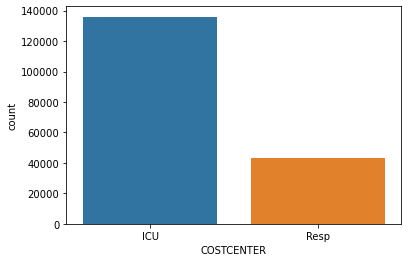

In [ ]:
sns.countplot(x= df_cpt_ARDS.COSTCENTER,);

In [ ]:
f'There are {df_cpt_ARDS[df_cpt_ARDS.COSTCENTER == "Resp"].HADM_ID.nunique()} from our patient list that were charged for ventilation support'

'There are 6052 from our patient list that were charged for ventilation support'

### DESCRIPTION column

##### Values

In [ ]:
# Unique values
df_cpt.DESCRIPTION.unique()

array([nan, 'VENT MGMT;SUBSQ DAYS(INVASIVE)',
       'VENT MGMT, 1ST DAY (INVASIVE)', 'VENT MGMT;SUBSQ DAYS(NIV)',
       'VENT MGMT,1ST DAY (NIV)'], dtype=object)

In [ ]:
# the two codes for ventilation
df_cpt_ARDS[df_cpt_ARDS.CPT_NUMBER == 94003].DESCRIPTION.unique()

array(['VENT MGMT;SUBSQ DAYS(INVASIVE)', 'VENT MGMT;SUBSQ DAYS(NIV)'],
      dtype=object)

In [ ]:
df_cpt_ARDS[df_cpt_ARDS.CPT_NUMBER == 94002].DESCRIPTION.unique()

array([nan, 'VENT MGMT, 1ST DAY (INVASIVE)', 'VENT MGMT,1ST DAY (NIV)'],
      dtype=object)

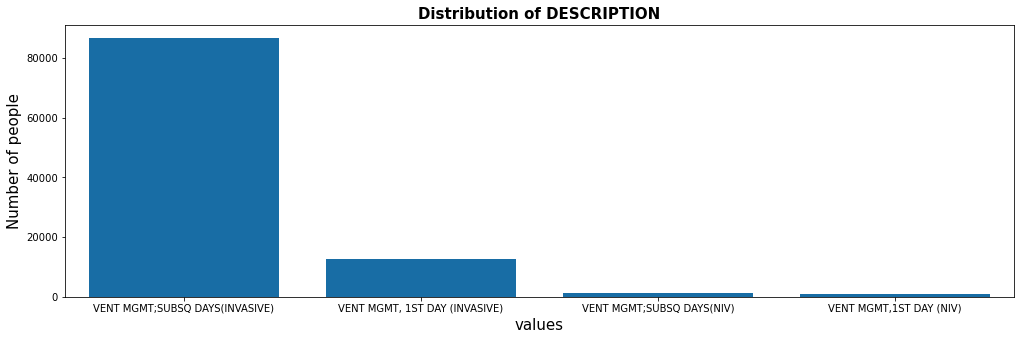

In [ ]:
plt.figure(figsize=(17,5))
ax = sns.countplot(x= df_cpt.DESCRIPTION, color='#0072BD')

ax.set_title("Distribution of DESCRIPTION", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15,)
ax.set_xlabel('values', fontsize=15,);

##### Missing values

In [ ]:
f'{df_cpt_ARDS[df_cpt_ARDS.COSTCENTER == "Resp"].DESCRIPTION.isnull().sum()} NaN in DESCRIPTION column when COSTCENTER=="Resp"'

'0 NaN in DESCRIPTION column when COSTCENTER=="Resp"'

In [ ]:
f'Missing in Descreption Overall:{round(df_cpt_ARDS.DESCRIPTION.isnull().sum()/len(df_cpt_ARDS)*100,2)}%'

'Missing in Descreption Overall:75.75%'

In [ ]:
df_cpt_ARDS[df_cpt_ARDS.COSTCENTER == "Resp"].head(2)

,ROW_ID,SUBJECT_ID,HADM_ID,COSTCENTER,CHARTDATE,CPT_CD,CPT_NUMBER,CPT_SUFFIX,TICKET_ID_SEQ,SECTIONHEADER,SUBSECTIONHEADER,DESCRIPTION
467848,470043,2322,181695,Resp,2177-11-26 00:00:00,94003,94003.0,NaN,NaN,Medicine,Pulmonary,VENT MGMT;SUBSQ DAYS(INVASIVE)
467849,470044,2322,181695,Resp,2177-11-27 00:00:00,94003,94003.0,NaN,NaN,Medicine,Pulmonary,VENT MGMT;SUBSQ DAYS(INVASIVE)


### CODE columns

In [ ]:
# both string and integer in CPT_CD, not good
df_cpt_ARDS[df_cpt_ARDS.COSTCENTER == 'Resp'].CPT_CD.unique()

array(['94003', '94002', 94003, 94002], dtype=object)

In [ ]:
# whether CPT_number hase only two values when COSTCENTER == Resp
df_cpt_ARDS[df_cpt_ARDS.COSTCENTER == 'Resp'].CPT_NUMBER.unique()

array([94003., 94002.])

In [ ]:
f'{df_cpt_ARDS[df_cpt_ARDS.COSTCENTER == "Resp"].HADM_ID.nunique()} from our patient list that were charged for ventilation'

'6052 from our patient list that were charged for ventilation'

In [ ]:
missing(df_cpt_ARDS)

Patients report from our list:
Missing: 366
perc.: 4.88%
Present: 7131
perc.: 95.12%
percentage of unique number of ARDS_patients in the table: 3.97%


# DATETIME EVENTS

| Column name   | [Definition from official MIMIC website](https://mimic-iv.mit.edu/docs/datasets/icu/chartevents/)                                                                      | 
|:--------------|:---------------------------------------------------------------------------------|
| **VALUE**        | The documented date - this is the value that corresponds to the concept referred to by itemid. For example, if querying for itemid: 225755 (“18 Gauge Insertion Date”), then the value column indicates the date the line was inserted.   |    
| **CHARTTIME**     | Records the time at which an observation was charted, and is usually the closest proxy to the time the data was actually measured.                                                             |
| **VALUEOM**      | The unit of measurement for the value - almost always the text string “Date”.         |                          

In [ ]:
# Load csv 
df_datetime = pd.read_csv('data/DATETIMEEVENTS.csv.gz', compression='gzip')

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_datetime.shape

(4485937, 14)

In [ ]:
df_datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485937 entries, 0 to 4485936
Data columns (total 14 columns):
ROW_ID          int64
SUBJECT_ID      int64
HADM_ID         float64
ICUSTAY_ID      float64
ITEMID          int64
CHARTTIME       object
STORETIME       object
CGID            int64
VALUE           object
VALUEUOM        object
WARNING         float64
ERROR           float64
RESULTSTATUS    float64
STOPPED         object
dtypes: float64(5), int64(4), object(5)
memory usage: 479.1+ MB


## Drop irrelevant columns 

Now, we drop columns, not relevant to our analysis. 

In [ ]:
# Drop ROW_ID, CGID, WARNING, ERROR, RESULTSTATUS, STOPPED
to_drop = ['ROW_ID', 'CGID', 'WARNING', 'ERROR', 'RESULTSTATUS', 'STOPPED']
df_datetime = df_datetime.drop(to_drop, axis=1)

In [ ]:
df_datetime.shape

(4485937, 8)

In [ ]:
df_datetime.head(3)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,VALUE,VALUEUOM
0,7657,121183.0,297945.0,3411,2172-03-14 11:00:00,2172-03-14 11:52:00,NaN,Date
1,7657,121183.0,297945.0,3411,2172-03-14 13:00:00,2172-03-14 12:36:00,NaN,Date
2,7657,121183.0,297945.0,3411,2172-03-14 15:00:00,2172-03-14 15:10:00,NaN,Date


## HADM completeness

In [ ]:
df_datetime.SUBJECT_ID.nunique()

29185

29185 unique patients. 

In [ ]:
df_datetime.HADM_ID.nunique()

36218

36218 unique hospital admissions/stays. Thus, some patients were admitted multiple times. 

In [ ]:
# Replace 'NaN' to numpy nan
df_datetime.replace('NaN', np.nan, inplace=True)

# Missing Values in HADM
df_datetime[df_datetime['HADM_ID'].isna()]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,VALUE,VALUEUOM
129587,26525,NaN,296365.0,3411,2137-01-10 13:45:00,2137-01-10 13:55:00,2137-01-17 00:00:00,Date
205344,23980,NaN,NaN,5684,2144-08-10 14:00:00,2144-08-10 14:00:00,NaN,Date
207193,1106,NaN,NaN,5684,2099-10-19 12:48:00,2099-10-19 13:27:00,2099-10-19 00:00:00,Date
210275,689,NaN,NaN,5684,2178-05-21 02:15:00,2178-05-21 02:21:00,2178-05-20 00:00:00,Date
210276,689,NaN,NaN,5684,2178-05-21 07:00:00,2178-05-21 14:33:00,2178-05-20 00:00:00,Date
210277,689,NaN,NaN,5684,2178-05-21 11:00:00,2178-05-21 14:33:00,2178-05-20 00:00:00,Date
211053,689,NaN,NaN,5684,2178-05-21 14:31:00,2178-05-21 14:33:00,2178-05-21 00:00:00,Date
214851,22114,NaN,NaN,5684,2114-07-06 00:15:00,2114-07-06 00:26:00,2114-07-04 00:00:00,Date
214852,22114,NaN,NaN,5684,2114-07-06 01:00:00,2114-07-06 01:19:00,2114-07-04 00:00:00,Date
220215,18602,NaN,NaN,5684,2146-09-06 03:00:00,2146-09-06 02:50:00,2146-08-31 00:00:00,Date


1772 Missing values for HADM_ID. **These patients will be dropped for further analysis**.

In [ ]:
df_datetime = df_datetime.dropna(subset=["HADM_ID"])

In [ ]:
df_datetime[df_datetime['HADM_ID'].isna()]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,VALUE,VALUEUOM


In [ ]:
df_datetime.shape

(4484165, 8)

# DIAGNOSES_ICD

## First Glance

In [ ]:
df_diagnosis = pd.read_csv('data/DIAGNOSES_ICD.csv.gz', 
                                compression='gzip')

In [ ]:
df_diagnosis.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [ ]:
df_diagnosis.shape

(651047, 5)

In [ ]:
df_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
ROW_ID        651047 non-null int64
SUBJECT_ID    651047 non-null int64
HADM_ID       651047 non-null int64
SEQ_NUM       651000 non-null float64
ICD9_CODE     651000 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [ ]:
df_diagnosis.nunique()

ROW_ID        651047
SUBJECT_ID     46520
HADM_ID        58976
SEQ_NUM           39
ICD9_CODE       6984
dtype: int64

## Dictionary ICD Diagnosis

In [ ]:
# read in dictionary with items
df_d_icd_diagnosis = pd.read_csv('data/D_ICD_DIAGNOSES.csv.gz', 
                               compression='gzip')

In [ ]:
df_d_icd_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
ROW_ID         14567 non-null int64
ICD9_CODE      14567 non-null object
SHORT_TITLE    14567 non-null object
LONG_TITLE     14567 non-null object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [ ]:
df_d_icd_diagnosis.ICD9_CODE.nunique()

14567

In [ ]:
df_d_icd_diagnosis.SHORT_TITLE.nunique()

14328

In [ ]:
df_d_icd_diagnosis.SHORT_TITLE.sample(20)

602       Gram-neg septicemia NOS
1965        Anaplastic lymph head
916      Basl cell ca skn low lmb
4546     Acute rheumatic pericard
8861      Jt derangement NEC-mult
4051     Corneal degeneration NOS
7783         Sprain supraspinatus
7927     Breech del/extrac aff NB
10265     Status autm crd dfbrltr
13895    Pois-analges/antipyr NOS
4006            Macular keratitis
285        TB pneumonia-exam unkn
8361     Osteoarthros NOS-forearm
8895        Villonod synovit-hand
13364     Hx gestational diabetes
13351    Hx of affective disorder
11318    Deep 3 deg burn arm-mult
7700     Fx medial malleolus-open
9735     Acq ab ut remn cerv stmp
3038      Attn deficit w hyperact
Name: SHORT_TITLE, dtype: object

## Drop irrelevant columns 

There are no irrelevant columns. 

## HADM completeness

In [ ]:
df_diagnosis.SUBJECT_ID.nunique()

46520

46520 unique patients. 

In [ ]:
df_diagnosis.HADM_ID.nunique()

58976

58976 unique hospital admissions/stays. Thus, some patients were admitted multiple times. 

In [ ]:
# Replace 'NaN' to numpy nan
df_diagnosis.replace('NaN', np.nan, inplace=True)

# Missing Values in HADM
df_diagnosis[df_diagnosis['HADM_ID'].isna()]

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE


0 missing HADM_ID values.

# Drgcodes

Diagnosis Related Groups (DRG), which are used by the hospital for billing purposes. **we might not need these table in the end**

Column|Description|type
----|:-----|:-----
**DRG_TYPE**|DRG_TYPE provides the type of DRG code in the entry. There are two types of DRG codes in the database which have overlapping ranges but distinct definitions for the codes. The three types of DRG codes in the MIMIC-III database are **‘HCFA’** (Health Care Financing Administration), **‘MS’** (Medicare), and **‘APR’** (All Payers Registry). **-->DROP**|object
**DGR_CODE**|DRG_CODE contains a code which represents the diagnosis billed for by the hospital. ***Tracheostomy*:44, 54. *Respitary* Disease with ventilation support: 475, 576, 566, 565, 575, 208, 207**|int64
**DESCRIPTION**|They categorize the treatment in a way that they can charge the patients|Object
**DRG_SEVERITY**|Severity and mortality allow for higher billing costs **--> DROP**|float
**DRG_MORTALITY**|**DROP**|float

In [ ]:
df_drgcodes = pd.read_csv('data/DRGCODES.csv.gz', 
                                compression='gzip')

In [ ]:
df_drgcodes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [ ]:
df_drgcodes.shape

(125557, 8)

In [ ]:
df_drgcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125557 entries, 0 to 125556
Data columns (total 8 columns):
ROW_ID           125557 non-null int64
SUBJECT_ID       125557 non-null int64
HADM_ID          125557 non-null int64
DRG_TYPE         125557 non-null object
DRG_CODE         125557 non-null int64
DESCRIPTION      125494 non-null object
DRG_SEVERITY     66634 non-null float64
DRG_MORTALITY    66634 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.7+ MB


In [ ]:
# HARDs missing from in this table
df_drgcodes.HADM_ID.isnull().sum()

0

## Seperate our ARDS_patient

In [ ]:
df_drgcodes_ARDS = df_drgcodes.loc[df_drgcodes['HADM_ID'].isin(liste_patienten)]

### DESCRIPTION column

In [ ]:
# number of different values
df_drgcodes_ARDS.DESCRIPTION.nunique()

662

##### Ventilation

In [ ]:
df_drgcodes_ARDS= df_drgcodes_ARDS.dropna(subset=["DESCRIPTION"])
df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("VENTI")].head()

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
173,82,12411,173718,HCFA,475,RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...,NaN,NaN
174,83,16053,189195,HCFA,475,RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...,NaN,NaN
271,180,4454,177326,HCFA,475,RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...,NaN,NaN
369,278,19872,134153,HCFA,475,RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...,NaN,NaN
451,614,11850,198955,HCFA,475,RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...,NaN,NaN


In [ ]:
# number of row
len(df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("VENTI")])

1770

In [ ]:
# Number of unique HADM_ID with ventilation support
df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("VENTI")].HADM_ID.nunique()

1770

In [ ]:
df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("VENTI")].DESCRIPTION.unique()

array(['RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR SUPPORT',
       'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH, AND NECK DIAGNOSES',
       'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITHOUT MAJOR OPERATING ROOM PROCEDURE',
       'ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSES EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITH MAJOR OPERATING ROOM PROCEDURE',
       'SEPTICEMIA W MECHANICAL VENTILATOR W/0 96+ HOURS AGE >17',
       'RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR SUPPORT <96 HRS',
       'RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR SUPPORT 96+ HRS',
       'SEPTICEMIA W MECHANICAL VENTILATOR 96+ HOURS AGE >17',
       'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT <96 HOURS',
       'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS'],
      dtype=object)

In [ ]:
# DRG_CODEs for Respiratory only for Repiratory system with ventilation. Tracheostmy look next
df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("VENTILATOR")].DRG_CODE.unique()

array([475, 576, 566, 565, 575, 208, 207])

##### Tracheostomy

In [ ]:
len(df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("stom")])

934

In [ ]:
# Number of unique HADM_ID with tracheostomy
df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("stom")].HADM_ID.nunique()

531

In [ ]:
# DRG_CODEs for tracheostomy
df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("stom")].DRG_CODE.unique()

array([44, 54, 42, 52, 53, 43])

##### No Tube or anything similar in description

In [ ]:
df_drgcodes_ARDS[df_drgcodes_ARDS['DESCRIPTION'].str.contains("TUB")].DESCRIPTION.unique()

array(['BACTERIAL & TUBERCULOUS INFECTIONS OF NERVOUS SYSTEM W MCC'],
      dtype=object)

# ICUSTAYS
 
ICUSTAY_ID is a generated identifier that is not based on any raw data identifier. The hospital and ICU databases are not intrinsically linked and so do not have any concept of an ICU encounter identifier.

| Column name   | [Definition from official MIMIC website](https://mimic-iv.mit.edu/docs/datasets/icu/chartevents/)                                                                      | 
|:--------------|:---------------------------------------------------------------------------------|
| **DBSOURCE**       | Original ICU database the data was sourced from. |    
| **FIRST_CAREUNIT & LAST_CAREUNIT**   | First and last ICU type in which the patient was cared for. |    
| **FIRST_WARDID & LAST_WARDID**     | Contain the first and last ICU unit in which the patient stayed.  | 
| **INTIME & OUTTIME**     | INTIME provides the date and time the patient was transferred into the ICU. OUTTIME provides the date and time the patient was transferred out of the ICU. | 
| **LOS**     | Length of stay for the patient for the given ICU stay. | 

In [ ]:
# Load csv 
df_icustays = pd.read_csv('data/ICUSTAYS.csv.gz', 
                                compression='gzip')

In [ ]:
df_icustays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [ ]:
df_icustays.shape

(61532, 12)

In [ ]:
df_icustays.nunique()

ROW_ID            61532
SUBJECT_ID        46476
HADM_ID           57786
ICUSTAY_ID        61532
DBSOURCE              3
FIRST_CAREUNIT        6
LAST_CAREUNIT         6
FIRST_WARDID         16
LAST_WARDID          17
INTIME            61531
OUTTIME           61518
LOS               40175
dtype: int64

In [ ]:
df_icustays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
ROW_ID            61532 non-null int64
SUBJECT_ID        61532 non-null int64
HADM_ID           61532 non-null int64
ICUSTAY_ID        61532 non-null int64
DBSOURCE          61532 non-null object
FIRST_CAREUNIT    61532 non-null object
LAST_CAREUNIT     61532 non-null object
FIRST_WARDID      61532 non-null int64
LAST_WARDID       61532 non-null int64
INTIME            61532 non-null object
OUTTIME           61522 non-null object
LOS               61522 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


## DBSOURCE

In [ ]:
df_icustays.FIRST_CAREUNIT.nunique()

6

In [ ]:
df_icustays.FIRST_CAREUNIT.unique()

array(['MICU', 'CCU', 'NICU', 'TSICU', 'SICU', 'CSRU'], dtype=object)

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['FIRST_CAREUNIT'].isna()])

0

## FIRST_CAREUNIT

In [ ]:
df_icustays.FIRST_CAREUNIT.nunique()

6

In [ ]:
df_icustays.FIRST_CAREUNIT.unique()

array(['MICU', 'CCU', 'NICU', 'TSICU', 'SICU', 'CSRU'], dtype=object)

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['FIRST_CAREUNIT'].isna()])

0

## LAST_CAREUNIT

In [ ]:
df_icustays.LAST_CAREUNIT.nunique()

6

In [ ]:
df_icustays.LAST_CAREUNIT.unique()

array(['MICU', 'CCU', 'SICU', 'NICU', 'TSICU', 'CSRU'], dtype=object)

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['LAST_CAREUNIT'].isna()])

0

## FIRST_WARDID

In [ ]:
df_icustays.FIRST_WARDID.nunique()

16

In [ ]:
df_icustays.FIRST_WARDID.unique()

array([52, 57, 12,  7, 56, 15, 14, 23, 33, 50, 16, 22, 26, 37, 38, 47])

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['FIRST_WARDID'].isna()])

0

## LAST_WARDID

In [ ]:
df_icustays.LAST_WARDID.nunique()

17

In [ ]:
df_icustays.LAST_WARDID.unique()

array([52, 57, 23, 12,  7, 56, 15, 14, 33, 50, 16, 22, 26, 37, 38, 42, 47])

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['LAST_WARDID'].isna()])

0

## INTIME

In [ ]:
df_icustays.INTIME.nunique()

61531

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['INTIME'].isna()])

0

## OUTTIME

In [ ]:
df_icustays.OUTTIME.nunique()

61518

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['OUTTIME'].isna()])

10

## LOS

In [ ]:
df_icustays.LOS.nunique()

40175

In [ ]:
# Missing Values 
len(df_icustays[df_icustays['LOS'].isna()])

10

## Columns we keep

'ITEMID', 'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STARTTIME', 'ENDTIME' 

# INPUTEVENTS CV

| Column name   | [Definition from official MIMIC website](https://mimic-iv.mit.edu/docs/datasets/icu/chartevents/)                                                                      | 
|:--------------|:---------------------------------------------------------------------------------|
| **AMOUNT & AMOUNTUOM**       | The amount of a drug or substance administered to the patient either between the STARTTIME and ENDTIME (if both are available) or at the ENDTIME (when the exact start time is unknown, but usually up to an hour before). |    
| **RATE & RATEUOM**   | Rate at which the drug or substance was administered to the patient either between the STARTTIME and ENDTIME (if both are available), or it lists the rate at which the drug is currently administered at the ENDTIME. |    
| **STORETIME**     | Time at which an observation was manually input or manually validated by a member of the clinical staff.   | 
| **ORDERID**     | Links multiple items contained in the same solution together.  | 
| **LINKORDERID**     | Links the same order across multiple instantiations. | 
| **STOPPED**     | Indicates whether the infusion has been disconnected or continued. | 
| **NEWBOTTLE**     | Indicates if a new preparation of the solution was hung at the bedside. | 

**ORIGINALAMOUNT, ORIGINALAMOUNTUOM, ORIGINALROUTE, ORIGINALRATE, ORIGINALRATEUOM , ORIGINALSITE**: These columns provide information about the solution the medication was a part of when it was first entered into the information system.

In [ ]:
# Load csv 
df_input_cv = pd.read_csv('data/INPUTEVENTS_CV.csv.gz', 
                                compression='gzip')

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,9,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_input_cv.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,592,24457,184834.0,205776.0,2193-09-11 09:00:00,30056,100.0,ml,NaN,NaN,...,756654,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
1,593,24457,184834.0,205776.0,2193-09-11 12:00:00,30056,200.0,ml,NaN,NaN,...,3564075,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
2,594,24457,184834.0,205776.0,2193-09-11 16:00:00,30056,160.0,ml,NaN,NaN,...,422646,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
3,595,24457,184834.0,205776.0,2193-09-11 19:00:00,30056,240.0,ml,NaN,NaN,...,5137889,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
4,596,24457,184834.0,205776.0,2193-09-11 21:00:00,30056,50.0,ml,NaN,NaN,...,8343792,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN


In [ ]:
df_input_cv.shape

(17527935, 22)

In [ ]:
f'Missing from the HADM_ID column: {round(df_input_cv.HADM_ID.isnull().sum()/len(df_input_cv)*100,2)}%'

'Missing from the HADM_ID column: 0.13%'

In [ ]:
df_input_cv_ards= df_input_cv.loc[df_input_cv['HADM_ID'].isin(liste_patienten)]

In [ ]:
df_input_cv_ards.nunique()

ROW_ID               4742012
SUBJECT_ID              3553
HADM_ID                 3889
ICUSTAY_ID              4431
CHARTTIME             642292
ITEMID                   824
AMOUNT                 63655
AMOUNTUOM                  9
RATE                    9592
RATEUOM                   10
STORETIME             846379
CGID                     787
ORDERID              2433325
LINKORDERID            61603
STOPPED                    4
NEWBOTTLE                  1
ORIGINALAMOUNT           199
ORIGINALAMOUNTUOM         11
ORIGINALROUTE             11
ORIGINALRATE            2449
ORIGINALRATEUOM            1
ORIGINALSITE              10
dtype: int64

In [ ]:
df_input_cv_ards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742012 entries, 20 to 17527868
Data columns (total 22 columns):
ROW_ID               int64
SUBJECT_ID           int64
HADM_ID              float64
ICUSTAY_ID           float64
CHARTTIME            object
ITEMID               int64
AMOUNT               float64
AMOUNTUOM            object
RATE                 float64
RATEUOM              object
STORETIME            object
CGID                 float64
ORDERID              int64
LINKORDERID          int64
STOPPED              object
NEWBOTTLE            float64
ORIGINALAMOUNT       float64
ORIGINALAMOUNTUOM    object
ORIGINALROUTE        object
ORIGINALRATE         float64
ORIGINALRATEUOM      object
ORIGINALSITE         object
dtypes: float64(8), int64(5), object(9)
memory usage: 832.1+ MB


### AMOUNT 

In [ ]:
df_input_cv_ards.AMOUNT.nunique()

63655

In [ ]:
# Missing Values 
len(df_input_cv_ards[df_input_cv_ards['AMOUNT'].isna()])

1356855

### AMOUNTUOM

In [ ]:
df_input_cv_ards.AMOUNTUOM.nunique()

9

In [ ]:
df_input_cv_ards.AMOUNTUOM.unique()

array(['ml', nan, 'mg', 'mcg', 'U', 'mEq', 'gm', 'str', 'mEQ', 'cal'],
      dtype=object)

In [ ]:
# Missing Values 
len(df_input_cv_ards[df_input_cv_ards['AMOUNTUOM'].isna()])

1315935

### RATE

In [ ]:
df_input_cv_ards.RATE.nunique()

9592

In [ ]:
# Missing Values 
len(df_input_cv_ards[df_input_cv_ards['RATE'].isna()])

3469569

### RATEUOM

In [ ]:
df_input_cv_ards.RATEUOM.nunique()

10

In [ ]:
df_input_cv_ards.RATEUOM.unique()

array([nan, 'mghr', 'Uhr', 'mcgkgmin', 'mgmin', 'Umin', 'mcgmin', 'mcghr',
       'mcgkghr', 'mgkghr', 'gmhr'], dtype=object)

In [ ]:
# Missing Values 
len(df_input_cv_ards[df_input_cv_ards['RATEUOM'].isna()])

3457508

### STOPPED

In [ ]:
df_input_cv_ards.STOPPED.nunique()

4

In [ ]:
df_input_cv_ards.STOPPED.unique()

array([nan, "D/C'd", 'Stopped', 'Restart', 'NotStopd'], dtype=object)

In [ ]:
# Missing Values 
len(df_input_cv_ards[df_input_cv_ards['STOPPED'].isna()])

4626030

## Columns we keep

'CHARTTIME', 'ITEMID', 'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STOPPED' 

# INPUTEVENTS MV

## First Glance

In [ ]:
# Load csv 
df_input_mv = pd.read_csv('data/INPUTEVENTS_MV.csv.gz', 
                                compression='gzip')

In [ ]:
df_input_mv.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,...,TOTALAMOUNTUOM,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE,ORIGINALAMOUNT,ORIGINALRATE
0,241,27063,139787,223259.0,2133-02-05 06:29:00,2133-02-05 08:45:00,225166,6.774532,mEq,NaN,...,ml,0,0,1,Rewritten,NaN,RN,2133-02-05 12:52:00,10.000000,0.050000
1,242,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225944,28.132997,ml,30.142497,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,28.132998,30.255817
2,243,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225166,2.813300,mEq,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,2.813300,0.050426
3,244,27063,139787,223259.0,2133-02-03 12:00:00,2133-02-03 12:01:00,225893,1.000000,dose,NaN,...,ml,0,0,2,Rewritten,RN,NaN,2133-02-03 17:06:00,1.000000,1.000000
4,245,27063,139787,223259.0,2133-02-03 12:00:00,2133-02-03 12:01:00,220949,100.000000,ml,NaN,...,ml,0,0,2,Rewritten,RN,NaN,2133-02-03 17:06:00,100.000000,0.000000


In [ ]:
df_input_mv.shape

(3618991, 31)

In [ ]:
df_input_mv.nunique()

ROW_ID                           3618991
SUBJECT_ID                         17680
HADM_ID                            21879
ICUSTAY_ID                         23386
STARTTIME                        1682649
ENDTIME                          2033053
ITEMID                               278
AMOUNT                           1299808
AMOUNTUOM                             16
RATE                              848060
RATEUOM                               16
STORETIME                        1510880
CGID                                 504
ORDERID                          2450079
LINKORDERID                      1872309
ORDERCATEGORYNAME                     16
SECONDARYORDERCATEGORYNAME             4
ORDERCOMPONENTTYPEDESCRIPTION          3
ORDERCATEGORYDESCRIPTION               5
PATIENTWEIGHT                       1362
TOTALAMOUNT                         2526
TOTALAMOUNTUOM                         1
ISOPENBAG                              2
CONTINUEINNEXTDEPT                     2
CANCELREASON    

In [ ]:
df_input_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618991 entries, 0 to 3618990
Data columns (total 31 columns):
ROW_ID                           int64
SUBJECT_ID                       int64
HADM_ID                          int64
ICUSTAY_ID                       float64
STARTTIME                        object
ENDTIME                          object
ITEMID                           int64
AMOUNT                           float64
AMOUNTUOM                        object
RATE                             float64
RATEUOM                          object
STORETIME                        object
CGID                             int64
ORDERID                          int64
LINKORDERID                      int64
ORDERCATEGORYNAME                object
SECONDARYORDERCATEGORYNAME       object
ORDERCOMPONENTTYPEDESCRIPTION    object
ORDERCATEGORYDESCRIPTION         object
PATIENTWEIGHT                    float64
TOTALAMOUNT                      float64
TOTALAMOUNTUOM                   object
ISOPENBAG

### AMOUNT 

In [ ]:
df_input_mv.AMOUNT.nunique()

1299808

In [ ]:
# Missing Values 
len(df_input_mv[df_input_mv['AMOUNT'].isna()])

0

### AMOUNTUOM

In [ ]:
df_input_mv.AMOUNTUOM.nunique()

16

In [ ]:
df_input_mv.AMOUNTUOM.unique()

array(['mEq', 'ml', 'dose', 'grams', 'units', 'mg', 'mcg', 'mmol', 'L',
       'mEq.', 'ml/hr', 'International Units', 'uL', 'ounces', 'pg',
       '/hour'], dtype=object)

In [ ]:
# Missing Values 
len(df_input_mv[df_input_mv['AMOUNTUOM'].isna()])

0

### RATE

In [ ]:
df_input_mv.RATE.nunique()

848060

In [ ]:
# Missing Values 
len(df_input_mv[df_input_mv['RATE'].isna()])

1576139

### RATEUOM

In [ ]:
df_input_mv.RATEUOM.nunique()

16

In [ ]:
df_input_mv.RATEUOM.unique()

array([nan, 'mL/hour', 'units/hour', 'mg/hour', 'mcg/hour', 'mcg/kg/min',
       'mcg/kg/hour', 'mg/min', 'mg/kg/hour', 'mL/kg/hour', 'mEq./hour',
       'grams/hour', 'grams/min', 'mL/min', 'mcg/min', 'grams/kg/min',
       'units/min'], dtype=object)

In [ ]:
# Missing Values 
len(df_input_mv[df_input_mv['RATEUOM'].isna()])

1576139

## Columns we keep

'ITEMID', 'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STARTTIME', 'ENDTIME' 

# LABEVENTS
 
The labevents table stores the results of all laboratory measurements made for a single patient. These include hematology measurements, blood gases, chemistry panels, and less common tests such as genetic assays. Note that the time associated with this result is the time of the fluid acquisition, not the time that the values were made available to the clinical staff. 
 

Some items are duplicated between the labevents and chartevents tables. In cases where there is disagreement between measurements, labevents should be taken as the ground truth.

Column|Description|type
----|:----|:----
**ITEMID**|Identifier for a single measurement type in the database. Each row associated with one (LAB)ITEMID|**int64**
**CHARTTIME**|CHARTTIME records the time at which an observation was charted, and is usually the closest proxy to the time the data was actually measured.|**object**
**VALUE**|contains the value measured for the concept identified by the ITEMID **(DROP??)**|**object**
**VALUENUM**|same as value but as float. When it comes to text then is is NaN|**float**
**VALUEUOM**|is the unit of measurement for the VALUE, if appropriate.|**object**
**FLAG**|indicates whether the laboratory value is considered **abnormal or not**, using pre-defined thresholds. Ig. for Leukocytes the higher normal limit is 11 and if the test result is 12 the the value is considered abnormal|**object**

**Items that we are going to use from this table:**

ITEM_LABEL|ITEM_ID
:----|----:
**PaO2(pO2)**|50821
**Base excess (blood gas)**|50802
**pH**|50820
**Hemoglobin**|51222
**Hematocrit**|51221
**Kreatinin**|50912

In [ ]:
df_labevents = pd.read_csv('data/LABEVENTS.csv.gz', 
                                compression='gzip')

In [ ]:
df_labevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal


In [ ]:
df_labevents.shape

(27854055, 9)

In [ ]:
df_labevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27854055 entries, 0 to 27854054
Data columns (total 9 columns):
ROW_ID        int64
SUBJECT_ID    int64
HADM_ID       float64
ITEMID        int64
CHARTTIME     object
VALUE         object
VALUENUM      float64
VALUEUOM      object
FLAG          object
dtypes: float64(2), int64(3), object(4)
memory usage: 1.9+ GB


## Missing HADM_IDs

In [ ]:
f'Missing from the HADM_ID column: {round(df_labevents.HADM_ID.isnull().sum()/len(df_labevents)*100,2)}%'

'Missing from the HADM_ID column: 20.14%'

In [ ]:
#There are around 5,6 Millrion rows with missing HADM_ID.
df_labevents.HADM_ID.isnull().sum()

5609021

## Seperate to our ARDS_patients

In [ ]:
df_labevents_ARDS = df_labevents.loc[df_labevents['HADM_ID'].isin(liste_patienten)]

In [ ]:
missing(df_labevents_ARDS)

Patients report from our list:
Missing: 43
perc.: 0.57%
Present: 7454
perc.: 99.43%
percentage of unique number of ARDS_patients in the table: 0.13%


### Bob: HADM_ID 153468

**Diagnose:** Infect Pyelonephritis, Bakterial Pneumonia, anemia, acidose

In [ ]:
# not enough
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==51516') # WBC

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1315745,1350657,2151,153468.0,51516,2174-04-07 09:03:00,3-5,NaN,#/hpf,NaN


In [ ]:
# enough observations and if we check in Chartevents table, they are the same
# we can also see at the flag that it states abnormal. That is brobably because the lower limit for Hemoglobin
# is at least for women 12.1 and they are all lower than that
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==51222') # Hemoglobin

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1288640,1351174,2151,153468.0,51222,2174-04-17 02:30:00,10.1,10.1,g/dL,abnormal
1288797,1351304,2151,153468.0,51222,2174-04-21 03:54:00,9.9,9.9,g/dL,abnormal
1290971,1351198,2151,153468.0,51222,2174-04-18 02:20:00,10.1,10.1,g/dL,abnormal
1291142,1351338,2151,153468.0,51222,2174-04-21 07:42:00,7.5,7.5,g/dL,abnormal
1291171,1351367,2151,153468.0,51222,2174-04-22 05:00:00,9.3,9.3,g/dL,abnormal
1307950,1351109,2151,153468.0,51222,2174-04-15 03:00:00,8.8,8.8,g/dL,abnormal
1307973,1351132,2151,153468.0,51222,2174-04-16 03:00:00,7.8,7.8,g/dL,abnormal
1308143,1351224,2151,153468.0,51222,2174-04-19 04:00:00,9.5,9.5,g/dL,abnormal
1310519,1351259,2151,153468.0,51222,2174-04-20 04:07:00,8.1,8.1,g/dL,abnormal
1310752,1351406,2151,153468.0,51222,2174-04-23 03:00:00,9.3,9.3,g/dL,abnormal


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==51221') # Hematocrit

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1288621,1351155,2151,153468.0,51221,2174-04-16 18:36:00,27.0,27.0,%,abnormal
1288639,1351173,2151,153468.0,51221,2174-04-17 02:30:00,28.1,28.1,%,abnormal
1288651,1351185,2151,153468.0,51221,2174-04-17 14:20:00,26.5,26.5,%,abnormal
1288796,1351303,2151,153468.0,51221,2174-04-21 03:54:00,28.0,28.0,%,abnormal
1290970,1351197,2151,153468.0,51221,2174-04-18 02:20:00,28.5,28.5,%,abnormal
1290982,1351209,2151,153468.0,51221,2174-04-18 18:30:00,29.1,29.1,%,abnormal
1291141,1351337,2151,153468.0,51221,2174-04-21 07:42:00,21.6,21.6,%,abnormal
1291157,1351353,2151,153468.0,51221,2174-04-21 20:20:00,24.9,24.9,%,abnormal
1291170,1351366,2151,153468.0,51221,2174-04-22 05:00:00,26.8,26.8,%,abnormal
1307949,1351108,2151,153468.0,51221,2174-04-15 03:00:00,25.2,25.2,%,abnormal


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50889') # CRP

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50912') ## Crea

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1288632,1351166,2151,153468.0,50912,2174-04-17 02:30:00,0.5,0.5,mg/dL,NaN
1288786,1351293,2151,153468.0,50912,2174-04-21 03:54:00,0.6,0.6,mg/dL,NaN
1290963,1351190,2151,153468.0,50912,2174-04-18 02:20:00,0.5,0.5,mg/dL,NaN
1290989,1351216,2151,153468.0,50912,2174-04-19 04:00:00,0.6,0.6,mg/dL,NaN
1291133,1351329,2151,153468.0,50912,2174-04-21 07:42:00,0.6,0.6,mg/dL,NaN
1291163,1351359,2151,153468.0,50912,2174-04-22 05:00:00,0.4,0.4,mg/dL,NaN
1307942,1351101,2151,153468.0,50912,2174-04-15 03:00:00,0.6,0.6,mg/dL,NaN
1307965,1351124,2151,153468.0,50912,2174-04-16 03:00:00,0.7,0.7,mg/dL,NaN
1308170,1351251,2151,153468.0,50912,2174-04-20 04:07:00,0.6,0.6,mg/dL,NaN
1310744,1351398,2151,153468.0,50912,2174-04-23 03:00:00,0.5,0.5,mg/dL,NaN


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50821') # PO2

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1291155,1351351,2151,153468.0,50821,2174-04-21 16:13:00,103,103.0,mm Hg,NaN
1307911,1351070,2151,153468.0,50821,2174-04-14 11:06:00,81,81.0,mm Hg,NaN
1307936,1351095,2151,153468.0,50821,2174-04-15 02:59:00,123,123.0,mm Hg,NaN
1310538,1351278,2151,153468.0,50821,2174-04-20 21:27:00,166,166.0,mm Hg,NaN
1310546,1351287,2151,153468.0,50821,2174-04-21 00:02:00,95,95.0,mm Hg,NaN
1310735,1351389,2151,153468.0,50821,2174-04-22 21:23:00,96,96.0,mm Hg,NaN
1315755,1350667,2151,153468.0,50821,2174-04-07 09:18:00,101,101.0,mm Hg,NaN
1315906,1350783,2151,153468.0,50821,2174-04-08 01:28:00,41,41.0,mm Hg,NaN
1315914,1350791,2151,153468.0,50821,2174-04-08 04:30:00,124,124.0,mm Hg,NaN
1315927,1350804,2151,153468.0,50821,2174-04-08 15:50:00,110,110.0,mm Hg,NaN


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50802') # pCO2

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1291151,1351347,2151,153468.0,50802,2174-04-21 16:13:00,3,3.0,mEq/L,NaN
1307931,1351090,2151,153468.0,50802,2174-04-15 02:59:00,6,6.0,mEq/L,NaN
1310534,1351274,2151,153468.0,50802,2174-04-20 21:27:00,5,5.0,mEq/L,NaN
1310541,1351281,2151,153468.0,50802,2174-04-21 00:02:00,5,5.0,mEq/L,NaN
1310727,1351381,2151,153468.0,50802,2174-04-22 21:23:00,4,4.0,mEq/L,NaN
1315748,1350660,2151,153468.0,50802,2174-04-07 09:18:00,-6,-6.0,mEq/L,NaN
1315902,1350779,2151,153468.0,50802,2174-04-08 01:28:00,0,0.0,mEq/L,NaN
1315909,1350786,2151,153468.0,50802,2174-04-08 04:30:00,0,0.0,mEq/L,NaN
1315920,1350797,2151,153468.0,50802,2174-04-08 15:50:00,-9,-9.0,mEq/L,NaN
1315931,1350808,2151,153468.0,50802,2174-04-08 17:56:00,-6,-6.0,mEq/L,NaN


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50820') # pH

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1291154,1351350,2151,153468.0,50820,2174-04-21 16:13:00,7.44,7.44,units,NaN
1307910,1351069,2151,153468.0,50820,2174-04-14 11:06:00,7.44,7.44,units,NaN
1307935,1351094,2151,153468.0,50820,2174-04-15 02:59:00,7.44,7.44,units,NaN
1310537,1351277,2151,153468.0,50820,2174-04-20 21:27:00,7.51,7.51,units,NaN
1310545,1351286,2151,153468.0,50820,2174-04-21 00:02:00,7.42,7.42,units,NaN
1310734,1351388,2151,153468.0,50820,2174-04-22 21:23:00,7.47,7.47,units,NaN
1315754,1350666,2151,153468.0,50820,2174-04-07 09:18:00,7.18,7.18,units,NaN
1315905,1350782,2151,153468.0,50820,2174-04-08 01:28:00,7.38,7.38,units,NaN
1315913,1350790,2151,153468.0,50820,2174-04-08 04:30:00,7.43,7.43,units,NaN
1315926,1350803,2151,153468.0,50820,2174-04-08 15:50:00,7.26,7.26,units,NaN


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50813') # lactat

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50963') # BNP

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==51196') # D-Dimere1

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==50915')# D-Dimere2

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG


In [ ]:
df_labevents_ARDS.query('HADM_ID == 153468 and ITEMID==51244') # lymohcytes

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1288799,1351306,2151,153468.0,51244,2174-04-21 03:54:00,11.9,11.9,%,abnormal
1315763,1350675,2151,153468.0,51244,2174-04-07 09:30:00,10.0,10.0,%,abnormal
1315887,1350764,2151,153468.0,51244,2174-04-08 01:00:00,11,11.0,%,abnormal


##### Almost for all the patients the distribution of blood test is more or less the same

## D_LABITEMS

In [ ]:
df_labitems= pd.read_csv('data/D_LABITEMS.csv.gz', compression='gzip')

Column|Description|type 
:--------------|:----------------|-----
**ITEMID**| the ID number of the item that connect to the lab_event table|int64
**LABEL**        |  Describes the concept which is represented by the ITEMID.   | object
**FLUID**     |   Substance on which the measurement was made.|object
**CATEGORY**      | Higher level information as to the type of measurement.   | object
**LOINC_CODE**      | An openly available ontology which provides a rich amount of information about the laboratory measurement including reference ranges, common units of measurement and other further detail regarding the measurement.**-->DROP**        | object

In [ ]:
df_labitems.head()

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN


In [ ]:
df_labitems.shape

(753, 6)

In [ ]:
df_labitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 6 columns):
ROW_ID        753 non-null int64
ITEMID        753 non-null int64
LABEL         753 non-null object
FLUID         753 non-null object
CATEGORY      753 non-null object
LOINC_CODE    585 non-null object
dtypes: int64(2), object(4)
memory usage: 35.4+ KB


In [ ]:
df_labitems.FLUID.unique()

array(['Cerebrospinal Fluid (CSF)', 'Joint Fluid', 'Other Body Fluid',
       'Pleural', 'Stool', 'Urine', 'BLOOD', 'Blood', 'Ascites',
       'Bone Marrow', 'OTHER BODY FLUID', 'URINE', 'JOINT FLUID', 'CSF',
       'ASCITES', 'STOOL'], dtype=object)

In [ ]:
df_labitems.CATEGORY.unique()

array(['Hematology', 'BLOOD GAS', 'Blood Gas', 'Chemistry', 'CHEMISTRY',
       'HEMATOLOGY'], dtype=object)

### search with item_id number

In [ ]:
df_labitems[df_labitems.ITEMID==50889]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
216,90,50889,C-Reactive Protein,Blood,Chemistry,1988-5


### search with text

In [ ]:
df_labitems[df_labitems.LABEL.str.contains("rotein")]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
176,50,50849,"Total Protein, Ascites",Ascites,Chemistry,2883-7
191,65,50864,Alpha-Fetoprotein,Blood,Chemistry,1834-1
216,90,50889,C-Reactive Protein,Blood,Chemistry,1988-5
302,176,50975,Protein Electrophoresis,Blood,Chemistry,24351-9
303,177,50976,"Protein, Total",Blood,Chemistry,2885-2
344,218,51018,"Total Protein, CSF",Cerebrospinal Fluid (CSF),Chemistry,2880-3
350,224,51024,"Total Protein, Joint Fluid",Joint Fluid,Chemistry,2886-0
369,243,51043,"Total Protein, Body Fluid",Other Body Fluid,Chemistry,2881-1
385,259,51059,"Total Protein, Pleural",Pleural,Chemistry,2882-9
394,268,51068,24 hr Protein,Urine,Chemistry,2889-4


# microbiologyevents
Contains microbiology information, including cultures acquired and associated sensitivities. It mostly has to do with antibiograms, in other words a test that takes 5 days for the result to come out and it is trying to identify the microorganism and it's sensibility in different antibiotics.

**We most probably wont take this table at all.** Only as a future work if we want to go deep into antibiotics and predictions.

Column|Description|type 
:--------------|:----------------|-----
**CHARTDATE**|CHARTDATE is the same as CHARTTIME, except there is no time available.|object
**CHARTTIME**|Not all observations have a CHARTTIME, but all observations have a CHARTDATE.|object
**SPEC_ITEMID**|Specimen which is tested for bacterial growth. The specimen is a sample derived from a patient; e.g. blood, urine, sputum, etc. **(DROP??)**| float64
**SPEC_TYPE_DESC**|description|object
**ORG_ITEMID**|The organism, if any, which grew when tested. If NULL, no organism grew (i.e. negative culture). **(DROP??)**|float64
**ORG_NAME**|Description |object
**ISOLATE_NUM**|For testing antibiotics, the isolated colony (integer; starts at 1)|float64
**DILUTION_TEXT**|Dilution values when testing antibiotic sensitivity. **-->DROP**|object
**DILUTION_COMPARISON**| same **-->DROP**|object
**DILUTION_VALUE**|same **-->DROP**|float64
**INTERPRETATION**|of the antibiotic sensitivity, and indicates the results of the test. “S” is sensitive, “R” is resistant, “I” is intermediate, and “P” is pending.|object

In [ ]:
df_microbiology = pd.read_csv('data/MICROBIOLOGYEVENTS.csv.gz', 
                                compression='gzip')

In [ ]:
df_microbiology.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_microbiology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631726 entries, 0 to 631725
Data columns (total 16 columns):
ROW_ID                 631726 non-null int64
SUBJECT_ID             631726 non-null int64
HADM_ID                631726 non-null int64
CHARTDATE              631726 non-null object
CHARTTIME              589954 non-null object
SPEC_ITEMID            631647 non-null float64
SPEC_TYPE_DESC         631726 non-null object
ORG_ITEMID             326881 non-null float64
ORG_NAME               328016 non-null object
ISOLATE_NUM            328016 non-null float64
AB_ITEMID              275834 non-null float64
AB_NAME                275834 non-null object
DILUTION_TEXT          267350 non-null object
DILUTION_COMPARISON    267178 non-null object
DILUTION_VALUE         267178 non-null float64
INTERPRETATION         275834 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 77.1+ MB


In [ ]:
df_microbiology.AB_ITEMID.nunique()

30

In [ ]:
df_microbiology.HADM_ID.isnull().sum()

0

In [ ]:
missing(df_microbiology)

Patients report from our list:
Missing: 248
perc.: 3.31%
Present: 7249
perc.: 96.69%
percentage of unique number of ARDS_patients in the table: 3.93%


# OUTPUTEVENTS

## First Glance

In [ ]:
# Load csv 
df_outputevents = df_output = pd.read_csv('data/OUTPUTEVENTS.csv.gz', 
                                compression='gzip')

In [ ]:
df_outputevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
0,344,21219,177991.0,225765.0,2142-09-08 10:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,NaN,NaN,NaN
1,345,21219,177991.0,225765.0,2142-09-08 12:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,NaN,NaN,NaN
2,346,21219,177991.0,225765.0,2142-09-08 13:00:00,40055,120.0,ml,2142-09-08 13:39:00,17269,NaN,NaN,NaN
3,347,21219,177991.0,225765.0,2142-09-08 14:00:00,40055,100.0,ml,2142-09-08 16:17:00,17269,NaN,NaN,NaN
4,348,21219,177991.0,225765.0,2142-09-08 16:00:00,40055,200.0,ml,2142-09-08 16:17:00,17269,NaN,NaN,NaN


In [ ]:
df_outputevents.shape

(4349218, 13)

In [ ]:
df_outputevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349218 entries, 0 to 4349217
Data columns (total 13 columns):
ROW_ID        int64
SUBJECT_ID    int64
HADM_ID       float64
ICUSTAY_ID    float64
CHARTTIME     object
ITEMID        int64
VALUE         float64
VALUEUOM      object
STORETIME     object
CGID          int64
STOPPED       float64
NEWBOTTLE     float64
ISERROR       float64
dtypes: float64(6), int64(4), object(3)
memory usage: 431.4+ MB


In [ ]:
df_outputevents.nunique()

ROW_ID        4349218
SUBJECT_ID      41857
HADM_ID         52008
ICUSTAY_ID      55076
CHARTTIME     1172101
ITEMID           1155
VALUE            2114
VALUEUOM            2
STORETIME     3201069
CGID             1551
STOPPED             0
NEWBOTTLE           0
ISERROR             0
dtype: int64

## Drop irrelevant columns 

We will drop 'FLAG', 'STORETIME', 'STOPPED', 'NEWBOTTLE', 'ISERROR' from this table. This will occur directly in the database.  

## HADM completeness

In [ ]:
df_outputevents.SUBJECT_ID.nunique()

41857

41857 unique patients. 

In [ ]:
df_outputevents.HADM_ID.nunique()

52008

52008 unique hospital admissions/stays. Thus, some patients were admitted multiple times. 

In [ ]:
# Replace 'NaN' to numpy nan
df_outputevents.replace('NaN', np.nan, inplace=True)

# Missing Values in HADM
df_outputevents[df_outputevents['HADM_ID'].isna()]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
202,16,22774,NaN,NaN,2145-08-01 21:00:00,40055,600.0,ml,2145-08-01 21:33:00,14431,NaN,NaN,NaN
203,17,22774,NaN,NaN,2145-08-01 22:00:00,40055,400.0,ml,2145-08-01 22:22:00,14431,NaN,NaN,NaN
204,18,22774,NaN,NaN,2145-08-02 00:00:00,40055,400.0,ml,2145-08-02 00:27:00,14431,NaN,NaN,NaN
205,19,7234,NaN,NaN,2160-07-18 01:30:00,40055,575.0,ml,2160-07-18 02:01:00,17053,NaN,NaN,NaN
206,20,7234,NaN,NaN,2160-07-18 05:00:00,40055,625.0,ml,2160-07-18 06:15:00,17053,NaN,NaN,NaN
207,21,7234,NaN,NaN,2160-07-18 08:00:00,40055,320.0,ml,2160-07-18 07:43:00,21093,NaN,NaN,NaN
208,22,7234,NaN,NaN,2160-07-18 09:00:00,40055,60.0,ml,2160-07-18 09:11:00,21093,NaN,NaN,NaN
209,23,7234,NaN,NaN,2160-07-18 10:00:00,40055,30.0,ml,2160-07-18 10:17:00,21093,NaN,NaN,NaN
210,24,7234,NaN,NaN,2160-07-18 12:00:00,40055,50.0,ml,2160-07-18 11:59:00,21093,NaN,NaN,NaN
211,25,7234,NaN,NaN,2160-07-18 14:00:00,40055,200.0,ml,2160-07-18 14:26:00,21093,NaN,NaN,NaN


There are around 4839 rows with missing HADM_ID.

### ITEM ID

In [ ]:
# Number of unique values  
df_outputevents.ITEMID.nunique()

1155

1155 different output measurement ID's.  

In [ ]:
df_outputevents.ITEMID.unique()

array([ 40055,  40069,  40077, ..., 226618, 226557, 226621])

### CHARTTIME
 
CHARTTIME is the time of an output event.

In [ ]:
# Missing Values in CHARTTIME
df_outputevents[df_outputevents['CHARTTIME'].isna()]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR


No missing values in CHARTTIME. 

### VALUE

In [ ]:
# Number of unique values  
df_outputevents.VALUE.nunique()

2114

2114 unique types of measurement. 

In [ ]:
# Missing Values
len(df_outputevents[df_outputevents['VALUE'].isna()])

88549

88549 Missing value values. 

### VALUEUOM

In [ ]:
# Number of unique values  
df_outputevents.VALUEUOM.nunique()

2

In [ ]:
df_outputevents.VALUEUOM.unique()

array(['ml', nan, 'mL'], dtype=object)

In [ ]:
# Missing Values
len(df_outputevents[df_outputevents['VALUEUOM'].isna()])

36251

# PATIENTS

| Column name   | [Definition from official MIMIC website](https://mimic-iv.mit.edu/docs/datasets/icu/chartevents/)                                                                      | 
|:--------------|:---------------------------------------------------------------------------------|
| **GENDER**       | Genotypical sex of the patient. |    
| **DOB**   | Date of birth of the given patient. Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows: the patient’s age at their first admission was determined. The date of birth was then set to exactly 300 years before their first admission. |    
| **DOD**     | Date of death for the given patient. DOD merged together DOD_HOSP and DOD_SSN, giving priority to DOD_HOSP if both were recorded.   | 
| **DOD_HOSP**     | Date of death as recorded in the hospital database. | 
| **DOD_SSN**     | Date of death from the social security database. | 


In [ ]:
# Load csv 
df_patients = pd.read_csv('data/PATIENTS.csv.gz', compression='gzip')

In [ ]:
df_patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [ ]:
df_patients.shape

(46520, 8)

In [ ]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
ROW_ID         46520 non-null int64
SUBJECT_ID     46520 non-null int64
GENDER         46520 non-null object
DOB            46520 non-null object
DOD            15759 non-null object
DOD_HOSP       9974 non-null object
DOD_SSN        13378 non-null object
EXPIRE_FLAG    46520 non-null int64
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [ ]:
df_patients.nunique()

ROW_ID         46520
SUBJECT_ID     46520
GENDER             2
DOB            32540
DOD            12911
DOD_HOSP        8747
DOD_SSN        11301
EXPIRE_FLAG        2
dtype: int64

## Drop irrelevant columns 

'DOD_HOSP' and 'DOD_SSN' will be dropped in the database. 

# prescriptions
Medications ordered for a given patient. **We most probably wont use this table** for now, as we wont take medications in our prediction. This will be included in our future work

Column|Description|type
----|:-----|:----
**STARTDATE<br/>& ENDDATE**|STARTDATE and ENDDATE specify the date period for which the prescription was valid.|object
**DRUG_TYPE**|Provides the type of drug prescribed. **-->DROP**|object
**DRUG**|The drug prescribed to the patient|object
**DRUG_NAME_POE<br/>& DRUG_NAME_GENERIC**|Same as drug column **-->DROP**|object
**FORMULARY_DRUG_CD,<br/> GSN & NDC**|These columns provide a representation of the drug in various coding systems. GSN is the Generic Sequence Number. NDC is the National Drug Code **-->DROP**|object<br/>float
**PROD_STRENGTH, DOSE_VAL_RX,<br/> DOSE_UNIT_RX, FORM_VAL_DISP<br/>& ROUT**| The route prescribed for the drug.|object
**FORM_UNIT_DISP**| same **-->DROP**|object

In [ ]:
df_prescription = pd.read_csv('data/PRESCRIPTIONS.csv.gz', 
                                compression='gzip')

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_prescription.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [ ]:
df_prescription.shape

(4156450, 19)

In [ ]:
df_prescription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156450 entries, 0 to 4156449
Data columns (total 19 columns):
ROW_ID               int64
SUBJECT_ID           int64
HADM_ID              int64
ICUSTAY_ID           float64
STARTDATE            object
ENDDATE              object
DRUG_TYPE            object
DRUG                 object
DRUG_NAME_POE        object
DRUG_NAME_GENERIC    object
FORMULARY_DRUG_CD    object
GSN                  object
NDC                  float64
PROD_STRENGTH        object
DOSE_VAL_RX          object
DOSE_UNIT_RX         object
FORM_VAL_DISP        object
FORM_UNIT_DISP       object
ROUTE                object
dtypes: float64(2), int64(3), object(14)
memory usage: 602.5+ MB


In [ ]:
df_prescription.HADM_ID.isnull().sum()

0

In [ ]:
missing(df_prescription)

Patients report from our list:
Missing: 490
perc.: 6.54%
Present: 7007
perc.: 93.46%
percentage of unique number of ARDS_patients in the table: 0.76%


# procedureevents_MV
Patient procedures for the subset of patients who were monitored in the ICU using the iMDSoft MetaVision system.

Column|Description|type
----|:-----|:-----
**STARTTIME**|start of the procedures|object
**ENDTIME**|end of the procedure|object
**ITEMID**|ID of the procedure|int64
**VALUE**| The value of the given item|float
**VALUEOM**|Units of measurement: 'None', 'hour', 'min', 'day'|object
**LOCATIONCATEGORY**|the location of the body part, when given **-->DROP**|object
**STORETIME**|records the date and time at which a note was saved into the system **-->DROP**|object
**CGID**| an ID for the caregivers **-->DROP**|int64
**ORDERID<rb/>& LINKORDERID**| the ID of the category of the procedure **-->DROP**|int64
**ORDERCATEGORYNAME**|Name of the category|object
**Rest columns**| There are no information about these columns and they also don't seem important for our study **-->DROP**


In [ ]:
df_procedure_mv = pd.read_csv('data/PROCEDUREEVENTS_MV.csv.gz', 
                                compression='gzip')

In [ ]:
df_procedure_mv.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [ ]:
df_procedure_mv.shape

(258066, 25)

In [ ]:
df_procedure_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258066 entries, 0 to 258065
Data columns (total 25 columns):
ROW_ID                        258066 non-null int64
SUBJECT_ID                    258066 non-null int64
HADM_ID                       258066 non-null int64
ICUSTAY_ID                    257978 non-null float64
STARTTIME                     258066 non-null object
ENDTIME                       258066 non-null object
ITEMID                        258066 non-null int64
VALUE                         258066 non-null float64
VALUEUOM                      258066 non-null object
LOCATION                      52612 non-null object
LOCATIONCATEGORY              52612 non-null object
STORETIME                     258066 non-null object
CGID                          258066 non-null int64
ORDERID                       258066 non-null int64
LINKORDERID                   258066 non-null int64
ORDERCATEGORYNAME             258066 non-null object
SECONDARYORDERCATEGORYNAME    0 non-null float64

In [ ]:
# Missing HADM_ID
df_procedure_mv.HADM_ID.isnull().sum()

0

## Values

##### VALUEUOM

In [ ]:
df_procedure_mv.VALUEUOM.unique()

array(['None', 'hour', 'min', 'day'], dtype=object)

<AxesSubplot:xlabel='VALUEUOM', ylabel='count'>

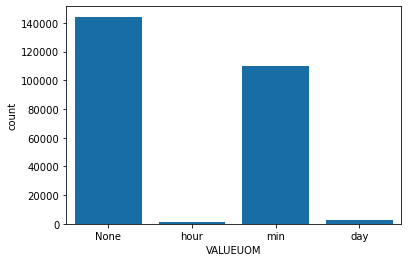

In [ ]:
sns.countplot(x=df_procedure_mv.VALUEUOM, color='#0072BD')

##### VALUE

In [ ]:
# number of different values
df_procedure_mv.VALUE.nunique()

13510

## ORDERCATEGORYNAME

In [ ]:
df_procedure_mv.ORDERCATEGORYNAME.nunique()

12

In [ ]:
df_procedure_mv.ORDERCATEGORYNAME.unique()

array(['Procedures', 'Ventilation', 'Invasive Lines', 'Imaging',
       'Peripheral Lines', 'Intubation/Extubation', 'Significant Events',
       'Continuous Procedures', 'Dialysis', 'Peritoneal Dialysis',
       'CRRT Filter Change', 'Communication'], dtype=object)

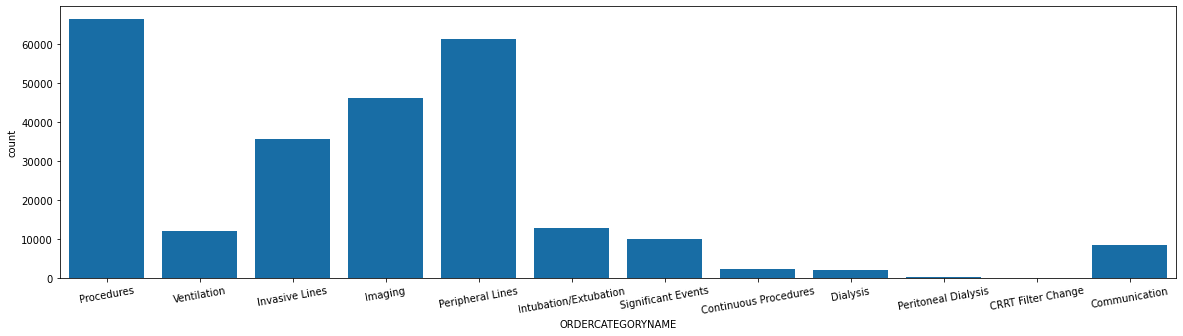

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='ORDERCATEGORYNAME', data=df_procedure_mv, color='#0072BD')
ocs, labels = plt.xticks()
plt.setp(labels, rotation=10);

## Missing from our patient list

In [ ]:
missing(df_procedure_mv)

Patients report from our list:
Missing: 3965
perc.: 52.89%
Present: 3532
perc.: 47.11%
percentage of unique number of ARDS_patients in the table: 4.44%


More than half are missing from out patient list, but it was expected because in this table we have only the patients that were treated with metavision

## Drop columns

In [ ]:
df_procedure_mv.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME',
       'ITEMID', 'VALUE', 'VALUEUOM', 'LOCATION', 'LOCATIONCATEGORY',
       'STORETIME', 'CGID', 'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME',
       'SECONDARYORDERCATEGORYNAME', 'ORDERCATEGORYDESCRIPTION', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE'],
      dtype='object')

In [ ]:
df_procedure_mv.LOCATIONCATEGORY.unique()

array([nan, 'Invasive Venous', 'Peripheral - old', 'Invasive Arterial',
       'Dialysis', 'Peritoneal Dialysis', 'ICP Line', 'Peripheral',
       'Intraosseous'], dtype=object)

In [ ]:
to_drop = ['LOCATION', 'CGID', 'LOCATIONCATEGORY', 'STORETIME', 'ORDERID', 
           'LINKORDERID', 'SECONDARYORDERCATEGORYNAME', 'ORDERCATEGORYDESCRIPTION',
          'ISOPENBAG', 'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
           'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE']
df_procedure_mv = df_procedure_mv.drop(to_drop, axis=1)

In [ ]:
df_procedure_mv.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,ORDERCATEGORYNAME
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,Procedures
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,Procedures
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,Ventilation
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,Procedures
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Invasive Lines


# PROCEDURES ICD 

| Column name   | [Definition from official MIMIC website](https://mimic-iv.mit.edu/docs/datasets/icu/chartevents/)                                                                      | 
|:--------------|:---------------------------------------------------------------------------------|
| **SEQ_NUM**       | The order in which the procedures occurred within the hospital stay. |    
| **ICD9_CODE**     | The International Coding Definitions (ICD) code.  |                          

In [ ]:
# Load csv 
df_procedures = pd.read_csv('data/PROCEDURES_ICD.csv.gz', 
                                compression='gzip')

In [ ]:
df_procedures.shape

(240095, 5)

In [ ]:
df_procedures.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [ ]:
df_procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240095 entries, 0 to 240094
Data columns (total 5 columns):
ROW_ID        240095 non-null int64
SUBJECT_ID    240095 non-null int64
HADM_ID       240095 non-null int64
SEQ_NUM       240095 non-null int64
ICD9_CODE     240095 non-null int64
dtypes: int64(5)
memory usage: 9.2 MB


## Dictionary ICD procedures

In [ ]:
# read in dictionary with items
df_d_icd_procedures = pd.read_csv('data/D_ICD_PROCEDURES.csv.gz', 
                               compression='gzip')

In [ ]:
df_d_icd_procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 4 columns):
ROW_ID         3882 non-null int64
ICD9_CODE      3882 non-null int64
SHORT_TITLE    3882 non-null object
LONG_TITLE     3882 non-null object
dtypes: int64(2), object(2)
memory usage: 121.4+ KB


In [ ]:
df_d_icd_procedures.ICD9_CODE.nunique()

3809

In [ ]:
df_d_icd_procedures.SHORT_TITLE.nunique()

3882

In [ ]:
df_d_icd_procedures.SHORT_TITLE.sample(20)

1157      Other pleural incision
775      Iridotomy w transfixion
1254      Cde for calculus remov
1023    Myringotomy w intubation
3674         Toxicology-lower GI
3052        Repair of hammer toe
1590             Pericardiectomy
3004     Toxicology-nervous syst
2403     Semin ves dx proced NEC
2602      Other myectomy of hand
3340    Adm neuroprotective agnt
1569    Oth periton adhesiolysis
2192       Chest cage sequestrec
3284    Other joint mobilization
1897       Inject tendon of hand
3101      Tot ostect-radius/ulna
3044             Patellar biopsy
2346    Implant bladder stimulat
534     Pros rep ventrc def-clos
3775    Autoimmune dis immunizat
Name: SHORT_TITLE, dtype: object

## Drop irrelevant columns 

All columns are relevant. 

## HADM completeness

In [ ]:
df_procedures.SUBJECT_ID.nunique()

42214

42214 unique patients. 

In [ ]:
df_procedures.HADM_ID.nunique()

52243

52243 unique hospital admissions/stays. Thus, some patients were admitted multiple times. 

In [ ]:
# Replace 'NaN' to numpy nan
df_procedures.replace('NaN', np.nan, inplace=True)

# Missing Values in HADM
df_procedures[df_procedures['HADM_ID'].isna()]

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE


There are no missing values for HADM_ID.

### SEQ_NUM

In [ ]:
# Number of unique values  
df_procedures.SEQ_NUM.nunique()

40

In [ ]:
df_procedures.SEQ_NUM.max()

40

### ICD9_CODE
 
There are two versions for this coding system: version 9 (ICD-9) and version 10 (ICD-10). These can be differentiated using the icd_version column. In general, ICD-10 codes are more detailed, though code mappings (or “cross-walks”) exist which convert ICD-9 codes to ICD-10 codes.

In [ ]:
# Number of unique values  
df_procedures.ICD9_CODE.nunique()

2009

2009 different diagnosis based on ICD 9 and 10. 

# Services
Lists services that a patient was admitted/transferred under.
The services table describes the service that a patient was admitted under. While a patient can be physicially located at a given ICU type (say MICU), they are not necessarily being cared for by the team which staffs the MICU. This can happen due to a number of reasons, including bed shortage. The SERVICES table should be used if interested in identifying the type of service a patient is receiving in the hospital. For example, if interested in identifying surgical patients, the recommended method is searching for patients admitted under a surgical service. 

Column|Description|type
----|:-----|:-----
**TRANSFERTIME**|TRANSFERTIME is the time at which the patient moved from the PREV_SERVICE (if present) to the CURR_SERVICE|object
**PREV_SERVICE**| previous service that the patient resides under.**-->DROP**|object
**CURR_SERVICE**| current service that the patient resides under.|object

Each service is listed in the table as an abbreviation - this is exactly how the data is stored in the hospital database. For user convenience, we have provided a description of each service type.

Service|  Description                                                                            
:------|:------------------------------------------------------------------------------------
CMED   |  The  Cardiac Medical - for non-surgical cardiac related admissions 
CSURG  |  Cardiac Surgery - for surgical cardiac admissions
DENT   |  Dental - for dental/jaw related admissions                                             
ENT    |  Ear, nose, and throat - conditions primarily affecting these areas                     
GU     |  Genitourinary - reproductive organs/urinary system                                     
GYN    |  Gynecological - female reproductive systems and breasts                                
MED    |  Medical - general service for internal medicine                                        
NB     |  Newborn - infants born at the hospital                                                 
NBB    |  Newborn baby - infants born at the hospital                                            
NMED   |  Neurologic Medical - non-surgical, relating to the brain                               
NSURG  |  Neurologic Surgical - surgical, relating to the brain                                  
OBS    |  Obstetrics - conerned with childbirth and the care of women giving birth                
ORTHO  |  Orthopaedic - surgical, relating to the musculoskeletal system                         
OMED   |  Orthopaedic medicine - non-surgical, relating to musculoskeletal system                
PSURG  |  Plastic - restortation/reconstruct. of the human body(inc luding cosmetic or aesthetic)
PSYCH  |  Psychiatric - mental disorders relating to mood, behaviour, cognition, or perceptions   
SURG   |  Surgical - general surgical service not classified elsewhere                           
TRAUM  |  Trauma - injury or damage caused by physical harm from an external source              
TSURG  |  Thoracic Surgical - surgery on the thorax, located between the neck and the abdomen    
VSURG  |  Vascular Surgical - surgery relating to the circulatory system  

In [ ]:
#load csv
df_services = pd.read_csv('data/SERVICES.csv.gz', 
                                compression='gzip')

In [ ]:
df_services.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,NaN,CMED
3,761,473,129194,2201-01-09 20:16:45,NaN,NB
4,762,474,194246,2181-03-23 08:24:41,NaN,NB


In [ ]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73343 entries, 0 to 73342
Data columns (total 6 columns):
ROW_ID          73343 non-null int64
SUBJECT_ID      73343 non-null int64
HADM_ID         73343 non-null int64
TRANSFERTIME    73343 non-null object
PREV_SERVICE    14668 non-null object
CURR_SERVICE    73343 non-null object
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


## Missing values

In [ ]:
# Missing HADM_ID
df_services.HADM_ID.isnull().sum()

0

In [ ]:
f'{df_services.PREV_SERVICE.isnull().sum()} or {round(df_services.PREV_SERVICE.isnull().sum()/len(df_services)*100,2)}% missing from PREV_SERVICE'

'58675 or 80.0% missing from CURR_SERVICE'

## Separate our patients

In [ ]:
df_services_ARDS = df_services.loc[df_services['HADM_ID'].isin(liste_patienten)]

### PREV_SERVICE

In [ ]:
f'{df_services_ARDS.PREV_SERVICE.isnull().sum()} or {round(df_services_ARDS.PREV_SERVICE.isnull().sum()/len(df_services_ARDS)*100,2)}% missing from PREV_SERVICE'

'7467 or 75.85% missing from CURR_SERVICE'

In [ ]:
df_services_ARDS.groupby('PREV_SERVICE').count()[['HADM_ID']]

,HADM_ID
PREV_SERVICE,
CMED,313
CSURG,64
ENT,10
GU,15
GYN,19
MED,959
NMED,128
NSURG,106
OBS,10


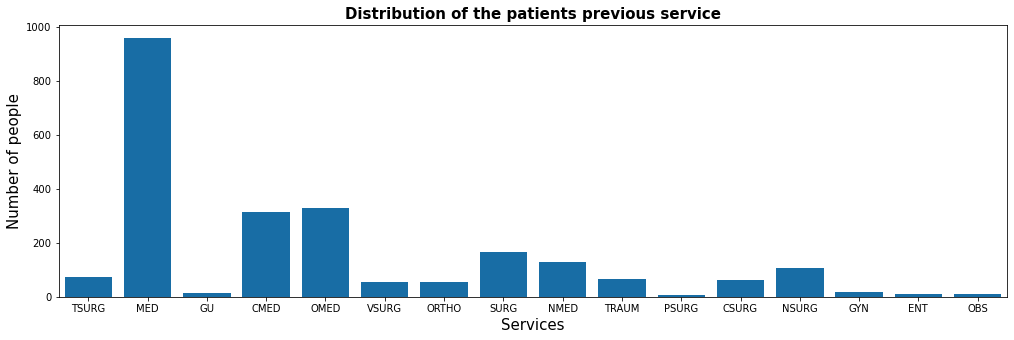

In [ ]:
plt.figure(figsize=(17,5))
ax = sns.countplot(x= df_services_ARDS.PREV_SERVICE, color='#0072BD')

ax.set_title("Distribution of the patients previous service", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15,)
ax.set_xlabel('Services', fontsize=15,);

### CURR_SERVICE 

In [ ]:
f'{df_services_ARDS.CURR_SERVICE.isnull().sum()} or {round(df_services_ARDS.CURR_SERVICE.isnull().sum()/len(df_services_ARDS)*100,2)}% missing from CURR_SERVICE'

'0 or 0.0% missing from CURR_SERVICE'

In [ ]:
df_services_ARDS.groupby('CURR_SERVICE').count()[['HADM_ID']]

,HADM_ID
CURR_SERVICE,
CMED,904
CSURG,266
ENT,17
GU,26
GYN,32
MED,5998
NBB,1
NMED,394
NSURG,345


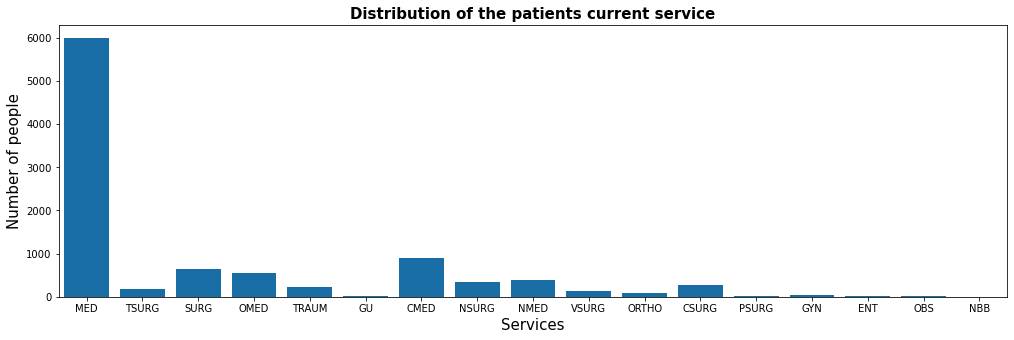

In [ ]:
plt.figure(figsize=(17,5))
ax = sns.countplot(x= df_services_ARDS.CURR_SERVICE, color='#0072BD')

ax.set_title("Distribution of the patients current service", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15,)
ax.set_xlabel('Services', fontsize=15,);

It looks like we have one baby in the services

### Identify the baby

In [ ]:
df_services_ARDS[df_services_ARDS.CURR_SERVICE == 'NBB']

,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
19141,26890,18093,173311,2110-01-30 15:55:34,NaN,NBB


### Check for missing patients

In [ ]:
missing(df_services)

Patients report from our list:
Missing: 2
perc.: 0.03%
Present: 7495
perc.: 99.97%
percentage of unique number of ARDS_patients in the table: 76.14%
